In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout

import numpy as np
import matplotlib.pyplot as plt

# load dataset

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train_original,y_train_original), (x_test_original, y_test_original) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# or (x_train_original, y_train_original), (x_test_original, y_test_original) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


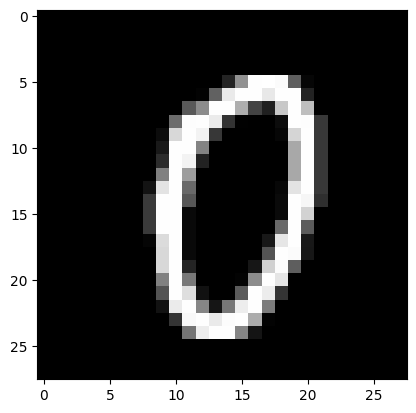

In [ ]:
plt.imshow(x_train_original[1000],cmap='gray')

In [ ]:
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
x_train=x_train_original.astype('float32')
x_test =x_test_original.astype('float32')
# normalize
x_train /= 255
x_test /= 255

In [ ]:
 # vectorize
 X_train = np.reshape(x_train, [-1,784])
 X_test = np.reshape(x_test, [-1,784])

# build a model

In [ ]:
model1 = Sequential()
model1.add (Dense(64,activation ='relu',input_dim=784))
model1.add (Dropout(0.5))
model1.add (Dense(10,activation ='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

# compile model

In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
history = model1.fit(X_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8432 - loss: 0.5877 - val_accuracy: 0.9342 - val_loss: 0.2256
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9397 - loss: 0.2057 - val_accuracy: 0.9527 - val_loss: 0.1695
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9570 - loss: 0.1508 - val_accuracy: 0.9587 - val_loss: 0.1443
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9657 - loss: 0.1185 - val_accuracy: 0.9639 - val_loss: 0.1258
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9709 - loss: 0.1053 - val_accuracy: 0.9654 - val_loss: 0.1167
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9743 - loss: 0.0912 - val_accuracy: 0.9657 - val_loss: 0.1196
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9786 - loss: 0.0737 - val_accuracy: 0.9686 - val_loss: 0.1077
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9805 - loss: 0.0676 - val_accu

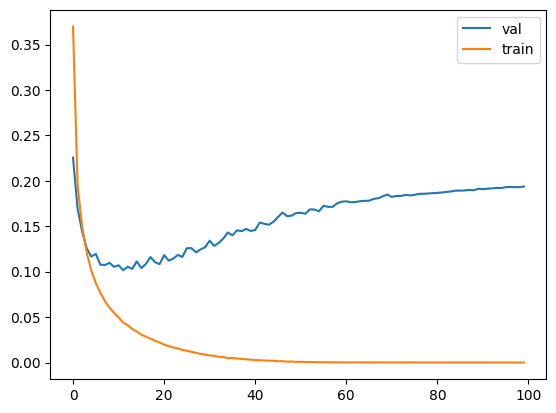

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'train'])

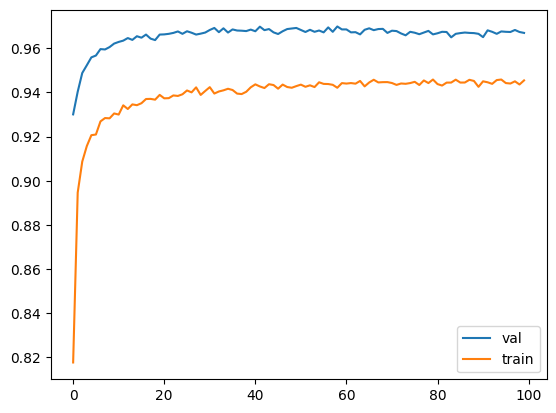

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val', 'train'])

In [ ]:
loss, acc = model1.evaluate(X_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9618 - loss: 0.2246

Testing loss: 0.19, acc: 0.97%


In [ ]:
predicted = model1.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
predicted_classes = np.argmax(predicted, axis=1)

In [ ]:
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)

predicted:
[7 2 1 ... 4 5 6]
True Label:
[7 2 1 ... 4 5 6]


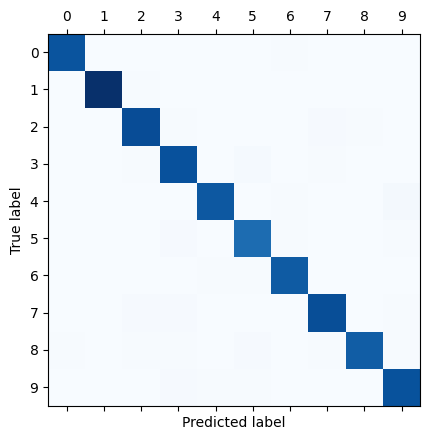

In [ ]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_original, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");